In [1]:
import math 
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [4]:
def myfun_b(t):
    b = np.array([0, 50*np.cos(5*t)])
    return b

def my_exact(t):
    return (1075/104)*np.exp(-t) - (35/104)*np.exp(-25*t) + (5/13)*np.sin(5*t)

In [5]:
def backward_euler_system_v2 (h,n,t0,y0,A,b):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    I = np.identity(len(y0))
    for k in range(0,n):
        Y[:,k+1] = linalg.inv(I-h*A) @ (Y[:,k] + h*b(tk+h))
        tk += h
    return Y

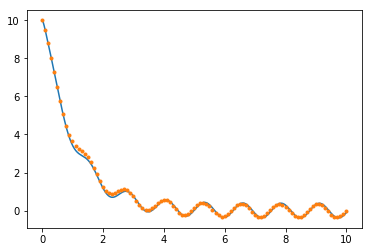

In [6]:
h = 0.1
n = 100
myA = np.array([[0,1],[-25,-26]])
y0 = np.array([10,0])
Y = backward_euler_system_v2(h,n,0,y0,myA, myfun_b)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')

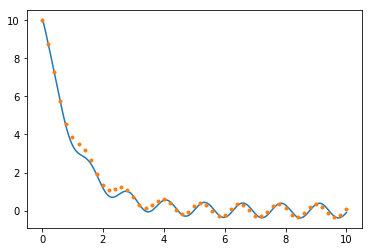

In [7]:
h = 0.2
n = 50
myA = np.array([[0,1],[-25,-26]])
y0 = np.array([10,0])
Y = backward_euler_system_v2(h,n,0,y0,myA, myfun_b)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')

In [8]:
#starts to be a lot less accurate with larger h

In [12]:
def implicit_trapezoid_system_v2 (h,n,t0,y0,A,b):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    I = np.identity(len(y0))
    for k in range(0,n):
        Y[:,k+1] = linalg.inv(I-(h/2)*A) @ (I+(h/2)*A) @ (Y[:,k] + h*b(tk+h))
        tk += h
    return Y

In [ ]:
h = 0.1
n = 100
myA = np.array([[0,1],[-25,-26]])
y0 = np.array([10,0])
Y = implicit_trapezoid_system_v2(h,n,0,y0,myA, myfun_b)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
print(Y[:, ])
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')

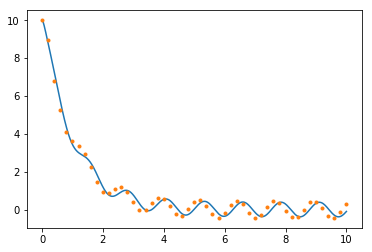

In [9]:
h = 0.2
n = 50
myA = np.array([[0,1],[-25,-26]])
y0 = np.array([10,0])
Y = implicit_trapezoid_system_v2(h,n,0,y0,myA, myfun_b)
t_approx = np.array(range(0,n+1))*h
t_exact = np.linspace(0,10,1000)
y = my_exact(t_exact)
plt.plot (t_exact,y)
plt.plot (t_approx,Y[0],'.')

In [10]:
def my_fun(t,y):
    A = np.array([[0,1],[-25,-26]])
    b = np.array([0,50*np.cos(5*t)])
    return A @ y + b
def runge_kutta_system (h,n,t0,y0,f):
    Y = np.zeros([len(y0),n+1])
    tk = t0
    Y[:,0] = y0
    for k in range(0,n):
        f1 = f(tk,Y[:,k])
        f2 = f(tk+(h/2),Y[:,k]+(h/2)*f1)
        f3 = f(tk+(h/2),Y[:,k]+(h/2)*f2)
        f4 = f(tk+h,Y[:,k]+h*f3)
        Y[:,k+1] = Y[:,k] + (h/6)*(f1+2*f2+2*f3+f4)
        tk += h
    return Y

h0 = 0.0025
n0 = 4000
Y0 = runge_kutta_system(h0,n0,0,y0,my_fun)

h1 = 0.005
n1 = 2000
h2 = 0.0025
n2 = 4000
Y1 = implicit_trapezoid_system_v2 (
    h1,n1,0,y0,myA,myfun_b)
Y2 = implicit_trapezoid_system_v2 (
    h2,n2,0,y0,myA,myfun_b)
error1 = linalg.norm(Y1[:,n1]-Y0[:,n0])
error2 = linalg.norm(Y2[:,n2]-Y0[:,n0])
print (error1/error2)

2.0064944061788994
